# Combating crime with surveillance

Crime prevention is the primary goal of CCTV (Dear et al., 2019). The underlying surveillance is framed as an effective instrument to combat crime rates through the continuous monitoring of public space by gathering data to anticipate potential safety threats (Ezzat et al., 2021). The practice is cost-efficient as multiple cameras are connected into a closed circuit, in which recordings are sent into a centralized monitoring room (Ratcliffe, 2006). In addition, spatial and temporal constraints are removed as the gaze is separated from face-to-face interactions. This gazing notion can discipline citizens into right behavior through the threat of always being watched and recorded (Norris, 2005). 

Overall, national governments could install more CCTV in order to combat crime and ensure public safety. This is beneficial through the psychological effects of video surveillance on citizen’s behavior as well as the presence of rapid enhancements in surveillance like biometric intelligence and computer vision (Norris, 2005).


## The Global Density of CCTV

Closed-Circuit Television emerged globally, with the density of cameras in public space varying across different countries. The bar graph illustrating the global density of CCTV cameras per 1,000 people reveals China as an extreme outlier. With over 200 million surveillance cameras in use, China's density far surpasses that of other nations, highlighting the potential scale and impact of extensive surveillance systems.

In [ ]:
%%html
<style>
.cell_output {
    filter: drop-shadow(0px 0px 5px rgba(0, 0, 0, 0.1));
    -webkit-backdrop-filter: blur(0);
}

.plotly-graph-div {
    border-radius: 10px;
    overflow: hidden;
    border: 1px solid #105fa2;
}
</style>

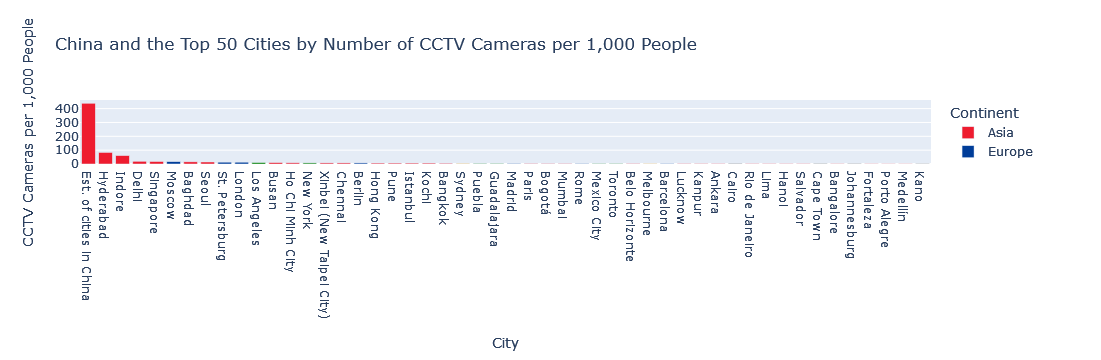

In [8]:
%run cameras_bargraph.ipynb

China's extensive use of CCTV has complex implications for crime prevention and civil liberties. While a high volume of cameras can deter crime by increasing the likelihood of being caught, the focus on surveillance for control raises concerns about authoritarianism and the balance between security and freedom. Scholars argue that, beyond tracking and monitoring, surveillance in China exercises social, political, and cultural control (Lyon, 2003; Foucault, 2012; Galič et al., 2017).

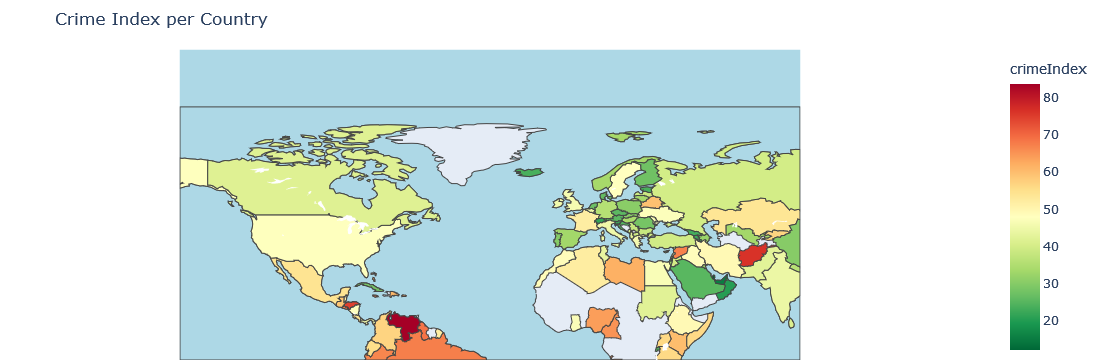

In [7]:
%run crime_map.ipynb

## Relation Between Number of CCTV Cameras and Gross National Income

The bar graph below highlights the relationship between the density of CCTV cameras and Gross National Income (GNI) per capita in various countries. Wealthier nations tend to have more CCTV cameras per 1,000 people, reflecting their greater economic resources for public safety and security. This investment in advanced surveillance systems is a crucial part of these countries' crime prevention strategies. Higher GNI correlates with increased funding for technology, both as a security tool and a symbol of technological advancement and status (Norris, 2005; Lyon, 2003).

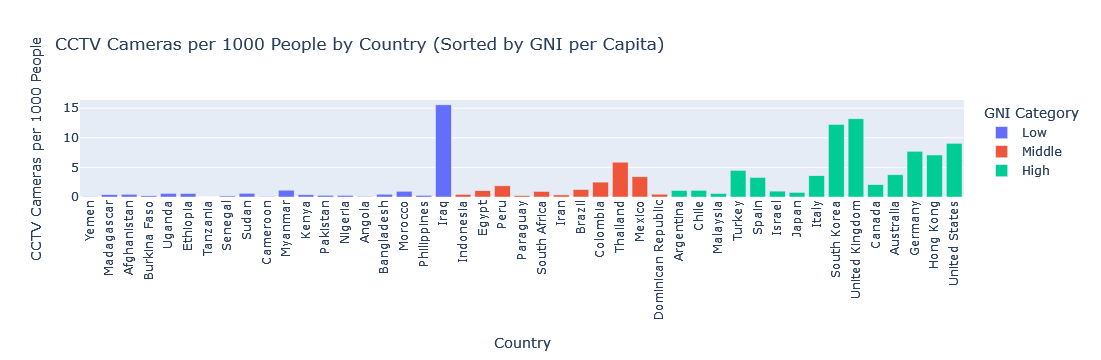

In [12]:
%run cameras_gdi_bargraph.ipynb

In contrast, countries with lower GNI face greater challenges in crime prevention due to limited economic capital and less efficient policing strategies. The lack of available technology hampers their ability to complement traditional crime-fighting methods, making it more difficult to maintain safety and stability. Therefore, it might be beneficial to discover global solutions for these countries to find ways to invest in local CCTV technologies to promote safe and stable societies.